**Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Displaying all the columns of the dataset**

In [2]:
pd.pandas.set_option("display.max_columns", None)

**Uploading the drilling data**

In [3]:
dataset = pd.read_csv("/content/X1_dataset.csv")

In [4]:
dataset.head()

,Depth,Hook Load,Bit Weight,Block Height,ROP - Average,Top Drive RPM,Top Drive Torque,Diff Press,Flow In Rate,Pump SPM - Total,Flow Out Percent,Bit Size,Gamma Ray,Mud Weight In,Pump Pressure,D-EXPONENT,formation
0,8000.0,179.0,22.6,18.97,349.2,90.0,8.9,514.84,601,186,42,8.75,93,10.1,2576.89,0.263782,0
1,8000.5,183.6,16.6,18.44,352.7,90.1,8.2,499.76,601,186,40,8.75,93,10.1,2571.24,0.255340,0
2,8001.0,182.5,16.8,17.90,352.3,90.2,8.3,494.32,601,186,39,8.75,93,10.1,2565.63,0.255836,0
3,8001.5,182.4,17.7,17.43,345.2,90.3,7.4,496.88,601,186,40,8.75,93,10.1,2561.84,0.259113,0
4,8002.0,182.9,17.2,16.94,344.6,90.1,8.7,506.99,601,186,41,8.75,93,10.1,2570.01,0.258371,0


**Print the shape of dataset with rows and columns**

In [5]:
print(dataset.shape)

(8551, 17)


**Print information of data types**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8551 entries, 0 to 8550
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             8551 non-null   float64
 1   Hook Load         8551 non-null   float64
 2   Bit Weight        8551 non-null   float64
 3   Block Height      8551 non-null   float64
 4   ROP - Average     8551 non-null   float64
 5   Top Drive RPM     8551 non-null   float64
 6   Top Drive Torque  8551 non-null   float64
 7   Diff Press        8551 non-null   float64
 8   Flow In Rate      8551 non-null   int64  
 9   Pump SPM - Total  8551 non-null   int64  
 10  Flow Out Percent  8551 non-null   int64  
 11  Bit Size          8551 non-null   float64
 12  Gamma Ray         8551 non-null   int64  
 13  Mud Weight In     8551 non-null   float64
 14  Pump Pressure     8551 non-null   float64
 15  D-EXPONENT        8551 non-null   float64
 16  formation         8551 non-null   int64  


**Finding out the missing values in the data**

In [7]:
dataset.isnull().sum()

Depth               0
Hook Load           0
Bit Weight          0
Block Height        0
ROP - Average       0
Top Drive RPM       0
Top Drive Torque    0
Diff Press          0
Flow In Rate        0
Pump SPM - Total    0
Flow Out Percent    0
Bit Size            0
Gamma Ray           0
Mud Weight In       0
Pump Pressure       0
D-EXPONENT          0
formation           0
dtype: int64

**Finding out highly correlated input parameters**

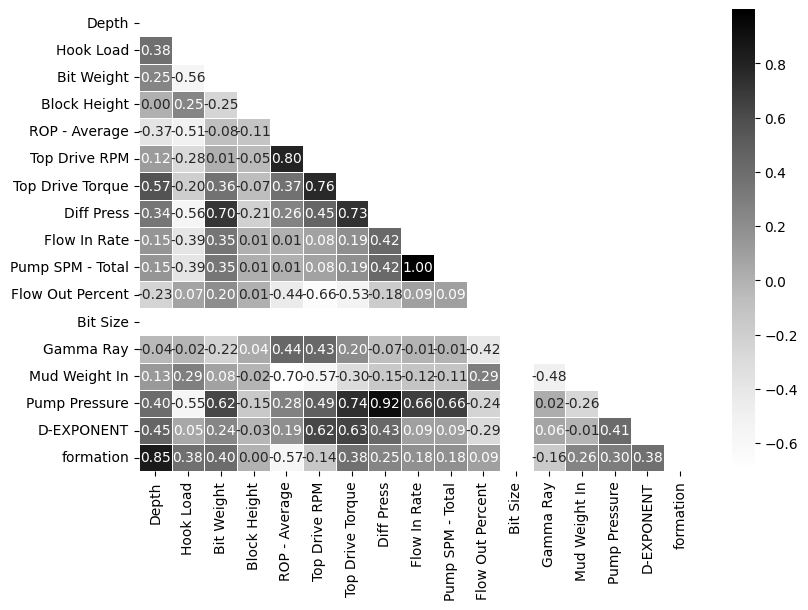

In [8]:
corr = dataset.corr(method='pearson')
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Greys', mask=np.triu(corr))
plt.show()


**New dataset with all the correlated fetures removed**

In [9]:
non_correlated_data = dataset.drop(["Bit Size","ROP - Average","Top Drive Torque","Pump SPM - Total","Bit Weight","Pump Pressure","Depth"], axis=1)

In [10]:
non_correlated_data

,Hook Load,Block Height,Top Drive RPM,Diff Press,Flow In Rate,Flow Out Percent,Gamma Ray,Mud Weight In,D-EXPONENT,formation
0,179.0,18.97,90.0,514.84,601,42,93,10.1,0.263782,0
1,183.6,18.44,90.1,499.76,601,40,93,10.1,0.255340,0
2,182.5,17.90,90.2,494.32,601,39,93,10.1,0.255836,0
3,182.4,17.43,90.3,496.88,601,40,93,10.1,0.259113,0
4,182.9,16.94,90.1,506.99,601,41,93,10.1,0.258371,0
...,...,...,...,...,...,...,...,...,...,...
8546,203.0,47.79,70.1,709.62,601,39,89,10.2,0.301221,4
8547,203.0,47.29,69.9,706.00,601,38,89,10.2,0.301687,4
8548,202.6,46.79,69.9,708.38,601,38,89,10.2,0.301738,4
8549,202.6,46.29,70.1,706.62,601,38,89,10.2,0.301724,4


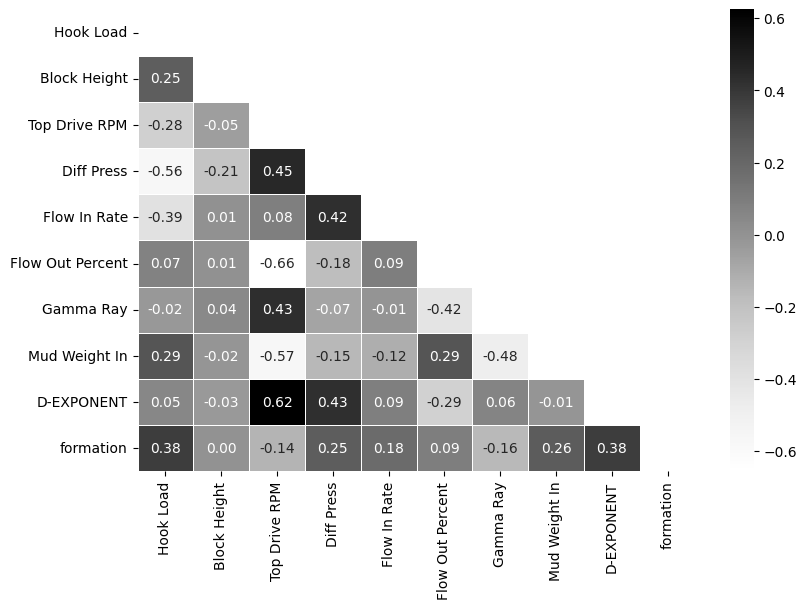

In [11]:
corr = non_correlated_data.corr(method='pearson')
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Greys', mask=np.triu(corr))
plt.show()

**Check the statistical parameters of the non-correlated features**

In [12]:
non_correlated_data.describe()

,Hook Load,Block Height,Top Drive RPM,Diff Press,Flow In Rate,Flow Out Percent,Gamma Ray,Mud Weight In,D-EXPONENT,formation
count,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000,8551.000000
mean,201.714221,43.496254,58.878763,563.858397,598.634078,47.275640,83.610104,10.201844,0.262881,2.842358
std,10.311981,27.123342,28.362610,169.511746,15.002175,18.458024,25.859033,0.082281,0.090018,1.644822
min,168.500000,-3.320000,0.100000,-59.010000,394.000000,31.000000,19.000000,10.100000,-0.349946,0.000000
25%,195.000000,19.870000,44.900000,485.535000,601.000000,37.000000,71.000000,10.200000,0.254695,2.000000
50%,202.000000,43.410000,70.000000,581.010000,601.000000,39.000000,89.000000,10.200000,0.298300,4.000000
75%,207.750000,66.960000,70.100000,669.285000,601.000000,40.000000,98.000000,10.200000,0.307457,4.000000
max,234.700000,91.450000,90.500000,982.470000,601.000000,89.000000,470.000000,10.400000,0.470156,4.000000


**Plotting box plot for individual non-correlated parameters and scatter plot between formation and individual non-correlated parameter**

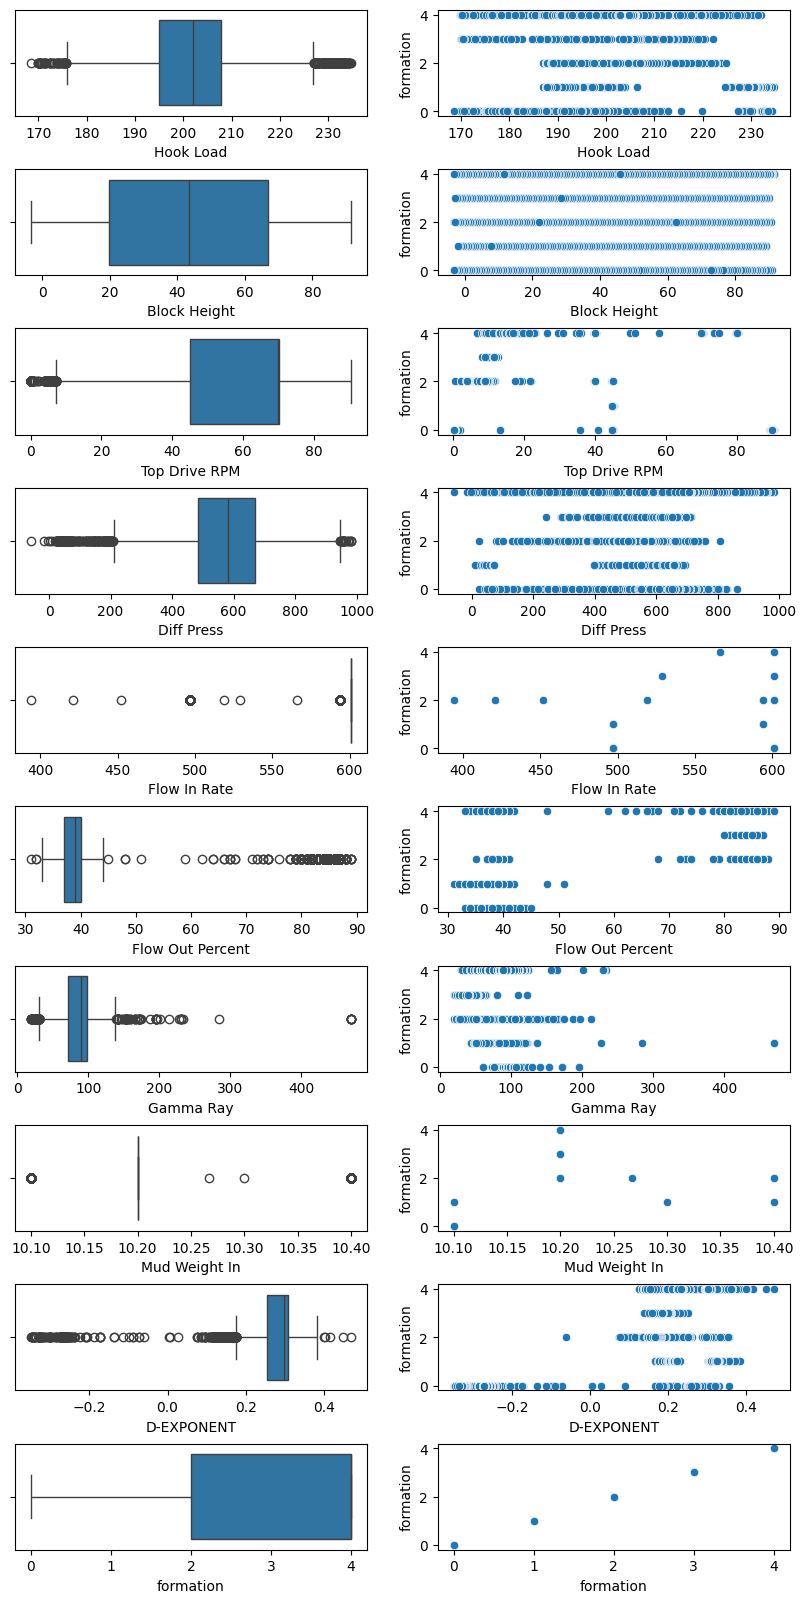

In [33]:
# Create a list of DataFrame columns
columns = list(non_correlated_data.columns)

# Create subplots
fig, ax = plt.subplots(10, 2, figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)

# Plot each column
for i in range(10):
    # AX 1: Boxplot
    sns.boxplot(x=columns[i], data=non_correlated_data, ax=ax[i, 0])
    # AX 2: Scatterplot
    sns.scatterplot(x=columns[i], y='formation', data=non_correlated_data, ax=ax[i, 1])

# Save the plot as a JPEG file
plt.savefig('drilling plot.jpg', format='jpeg')

# Display the plot
plt.show()


**Outliers removal using z-score where threshold for outlier detection was -3 and +3**

In [14]:
from scipy import stats

# Assuming dataset is your DataFrame

# Calculate Z-scores for each column in the dataset
z_scores = stats.zscore(non_correlated_data)

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on the threshold
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Remove outliers from the dataset
dataset_no_outliers = non_correlated_data[~outliers]

# Summary statistics of the dataset after removing outliers
print("Summary statistics after removing outliers:")
print(dataset_no_outliers.describe())


Summary statistics after removing outliers:
         Hook Load  Block Height  Top Drive RPM   Diff Press  Flow In Rate  \
count  8154.000000   8154.000000    8154.000000  8154.000000   8154.000000   
mean    201.262436     43.228592      60.427189   579.966522    600.792249   
std       9.353097     27.208932      27.535113   149.898467      1.237526   
min     170.900000     -3.320000       0.900000    56.440000    566.000000   
25%     195.000000     19.430000      45.100000   498.305000    601.000000   
50%     201.900000     42.760000      70.000000   585.505000    601.000000   
75%     207.400000     66.930000      70.200000   674.775000    601.000000   
max     232.000000     91.450000      90.500000   982.470000    601.000000   

       Flow Out Percent    Gamma Ray  Mud Weight In   D-EXPONENT    formation  
count       8154.000000  8154.000000    8154.000000  8154.000000  8154.000000  
mean          47.620186    82.386436      10.202551     0.274579     2.945303  
std          

**Plotting data without outliers**

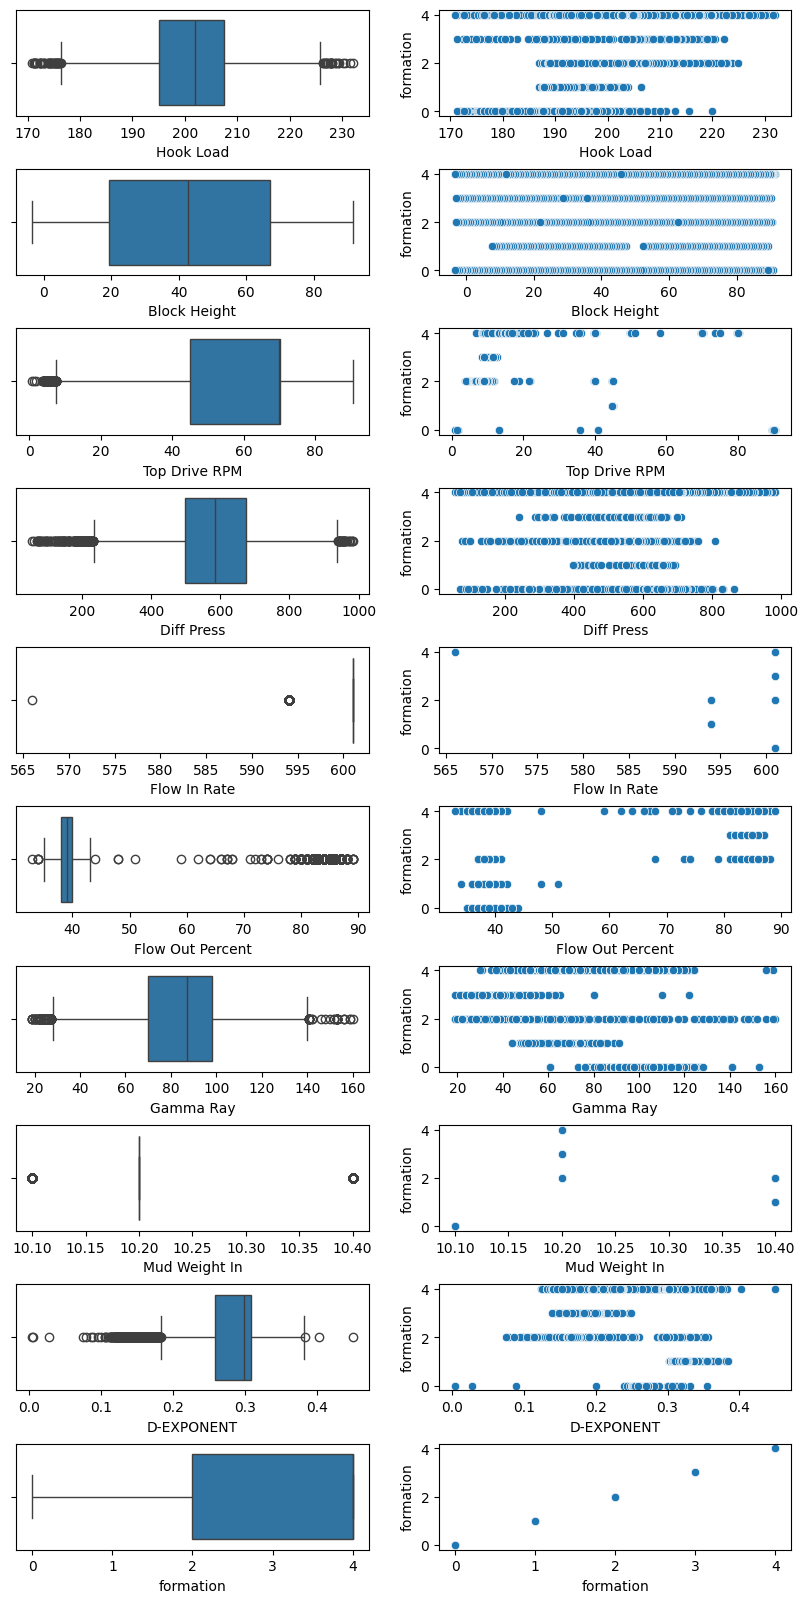

In [15]:
# Create a list of DataFrame columns
columns = list(dataset_no_outliers.columns)

# Create subplots
fig, ax = plt.subplots(10, 2, figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)

# Plot each column
for i in range(10):
    # AX 1: Boxplot
    sns.boxplot(x=columns[i], data=dataset_no_outliers, ax=ax[i, 0])
    # AX 2: Scatterplot
    sns.scatterplot(x=columns[i], y='formation', data=dataset_no_outliers, ax=ax[i, 1])

# Save the plot as a JPEG file
plt.savefig('no_outlier_plot.jpg', format='jpeg')

# Display the plot
plt.show()

**Normalizing the dataset**

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataset
normalized_dataset = scaler.fit_transform(dataset_no_outliers)

# Convert the normalized dataset back to a DataFrame (optional)
normalized_dataset = pd.DataFrame(normalized_dataset, columns=dataset_no_outliers.columns)

# Summary statistics of the normalized dataset
print("Summary statistics of the normalized dataset:")
print(normalized_dataset.describe())


Summary statistics of the normalized dataset:
         Hook Load  Block Height  Top Drive RPM   Diff Press  Flow In Rate  \
count  8154.000000   8154.000000    8154.000000  8154.000000   8154.000000   
mean      0.496930      0.491174       0.664366     0.565345      0.994064   
std       0.153079      0.287105       0.307312     0.161872      0.035358   
min       0.000000      0.000000       0.000000     0.000000      0.000000   
25%       0.394435      0.240055       0.493304     0.477161      1.000000   
50%       0.507365      0.486230       0.771205     0.571326      1.000000   
75%       0.597381      0.741268       0.773438     0.667727      1.000000   
max       1.000000      1.000000       1.000000     1.000000      1.000000   

       Flow Out Percent    Gamma Ray  Mud Weight In   D-EXPONENT    formation  
count       8154.000000  8154.000000    8154.000000  8154.000000  8154.000000  
mean           0.261075     0.449549       0.341836     0.606382     0.736326  
std        

**Making prediction of formation using linear regression model on normalized dataset.**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Assuming 'normalized_dataset' contains the features and 'formation' is the target variable

# Split the dataset into features (X) and target variable (y)
X_normalized_drilling = normalized_dataset.drop(columns=['formation'])
y_normalized_drilling = normalized_dataset['formation']

# Initialize Linear Regression model
linear_model = LinearRegression().fit(X_normalized_drilling,y_normalized_drilling)

linear_model.score(X_normalized_drilling, y_normalized_drilling)


0.7694620112373693

**Now performing the same EDA process for the wine quality dataset**

**Uploading the wine quality dataset**

In [21]:
data = pd.read_csv("/content/winequality-white.csv", sep = ';')

In [22]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Checking the shape of the data**

In [24]:
print(data.shape)

(4898, 12)


**Print information of data types**

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Finding out the missing values in the data**

In [26]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Finding out highly correlated input parameters**

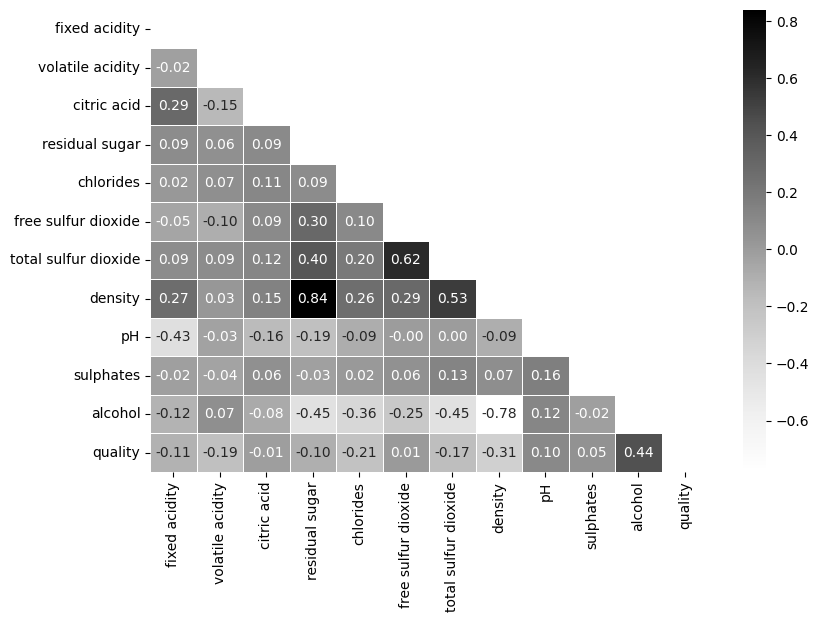

In [27]:
corr = data.corr(method='pearson')
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Greys', mask=np.triu(corr))
plt.show()

**Data with correlation features removed**

In [28]:
non_correlated_wine_data = data.drop(["density","total sulfur dioxide"], axis=1)

In [29]:
non_correlated_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,3.34,0.38,12.8,7


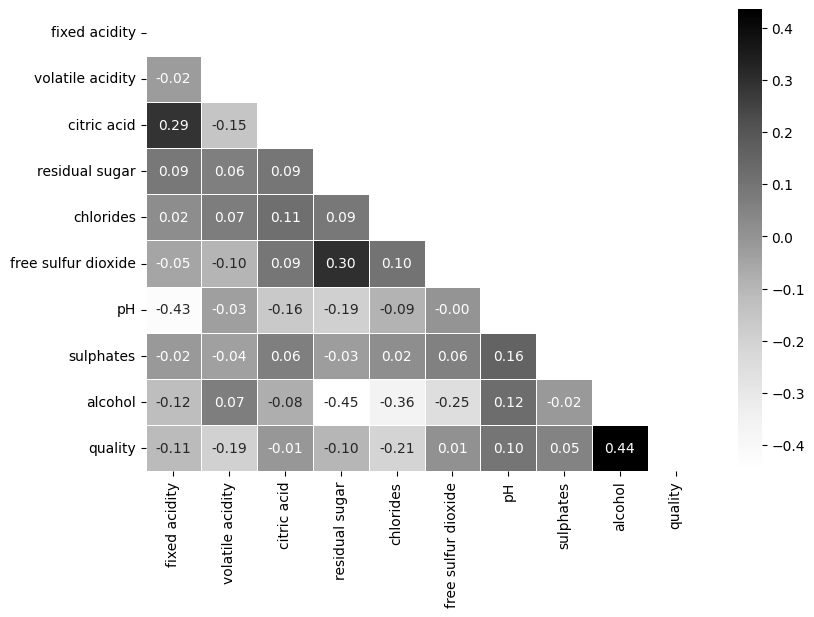

In [30]:
corr = non_correlated_wine_data.corr(method='pearson')
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Greys', mask=np.triu(corr))
plt.show()

**Check the statistical parameters of the non-correlated features**

In [31]:
non_correlated_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,3.820000,1.080000,14.200000,9.000000


**Plotting box plot for individual non-correlated parameters and scatter plot between quality and individual non-correlated parameter**

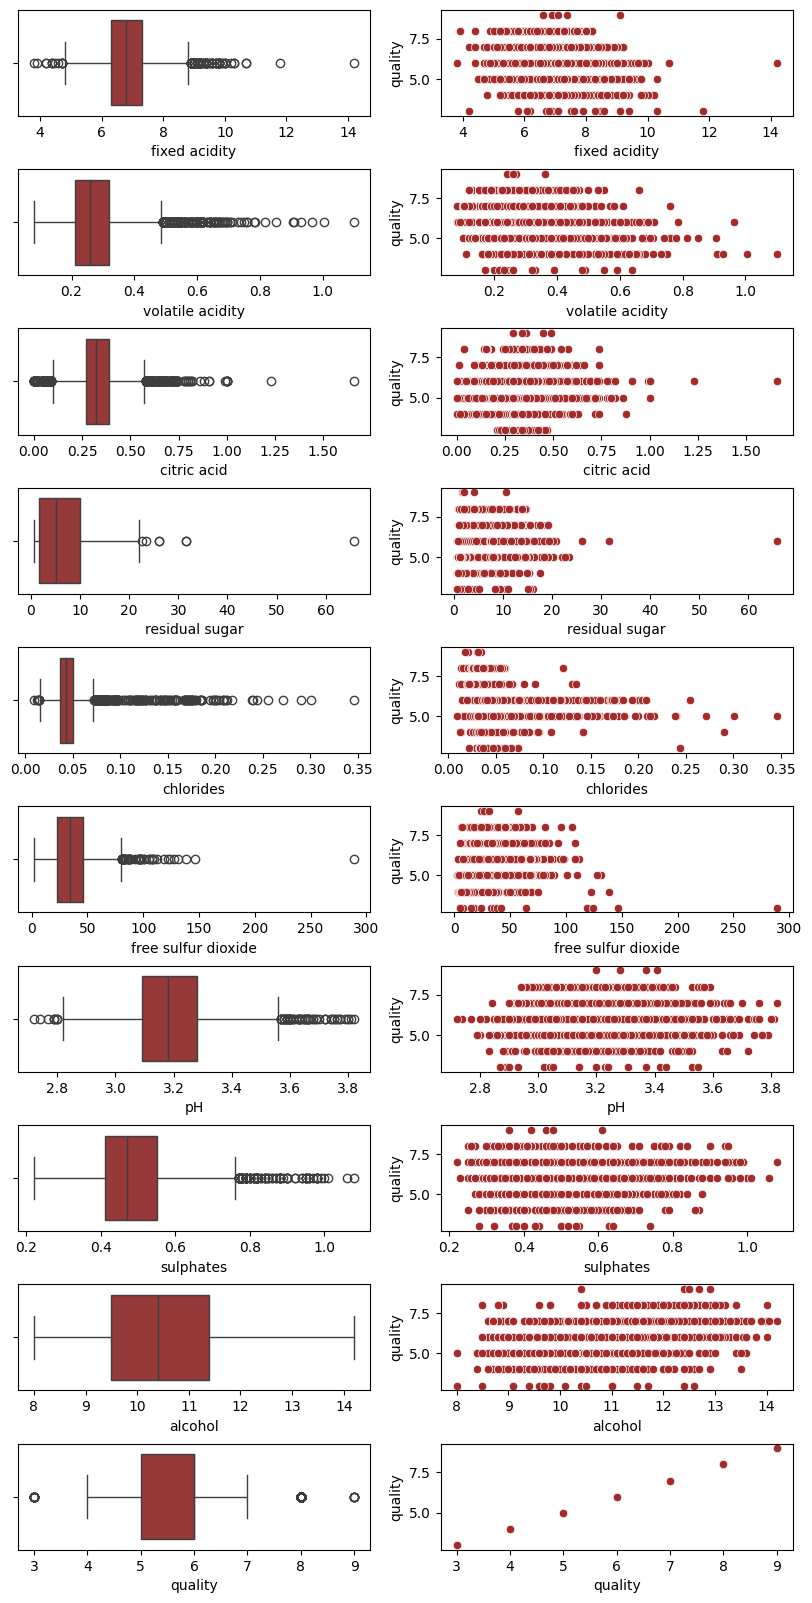

In [42]:
# Create a list of DataFrame columns
columns = list(non_correlated_wine_data.columns)

# Create subplots
fig, ax = plt.subplots(10, 2, figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)

# Plot each column
for i in range(10):
    # AX 1: Boxplot
    sns.boxplot(x=columns[i], data=non_correlated_wine_data, ax=ax[i, 0],color='Brown')
    # AX 2: Scatterplot
    sns.scatterplot(x=columns[i], y='quality', data=non_correlated_wine_data, ax=ax[i, 1], color='Brown')

# Save the plot as a JPEG file
plt.savefig('wine outlier plot.jpg', format='jpeg')

# Display the plot
plt.show()

**Outliers removal using z-score where threshold for outlier detection was -3 and +3**

In [34]:
from scipy import stats

# Calculate Z-scores for each column in the dataset
z_scores = stats.zscore(non_correlated_wine_data)

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers based on the threshold
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Remove outliers from the dataset
data_no_outliers = non_correlated_wine_data[~outliers]

# Summary statistics of the dataset after removing outliers
print("Summary statistics after removing outliers:")
print(data_no_outliers.describe())

Summary statistics after removing outliers:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4490.000000       4490.000000  4490.000000     4490.000000   
mean        6.840145          0.271402     0.326396        6.416214   
std         0.786750          0.086106     0.101083        4.952917   
min         4.400000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.762500   
50%         6.800000          0.260000     0.310000        5.300000   
75%         7.300000          0.320000     0.380000        9.900000   
max         9.300000          0.580000     0.690000       20.800000   

         chlorides  free sulfur dioxide           pH    sulphates  \
count  4490.000000          4490.000000  4490.000000  4490.000000   
mean      0.043182            34.875056     3.188067     0.485612   
std       0.011722            15.433239     0.143439     0.105878   
min       0.012000             2.000000 

**Plotting data without outliers**

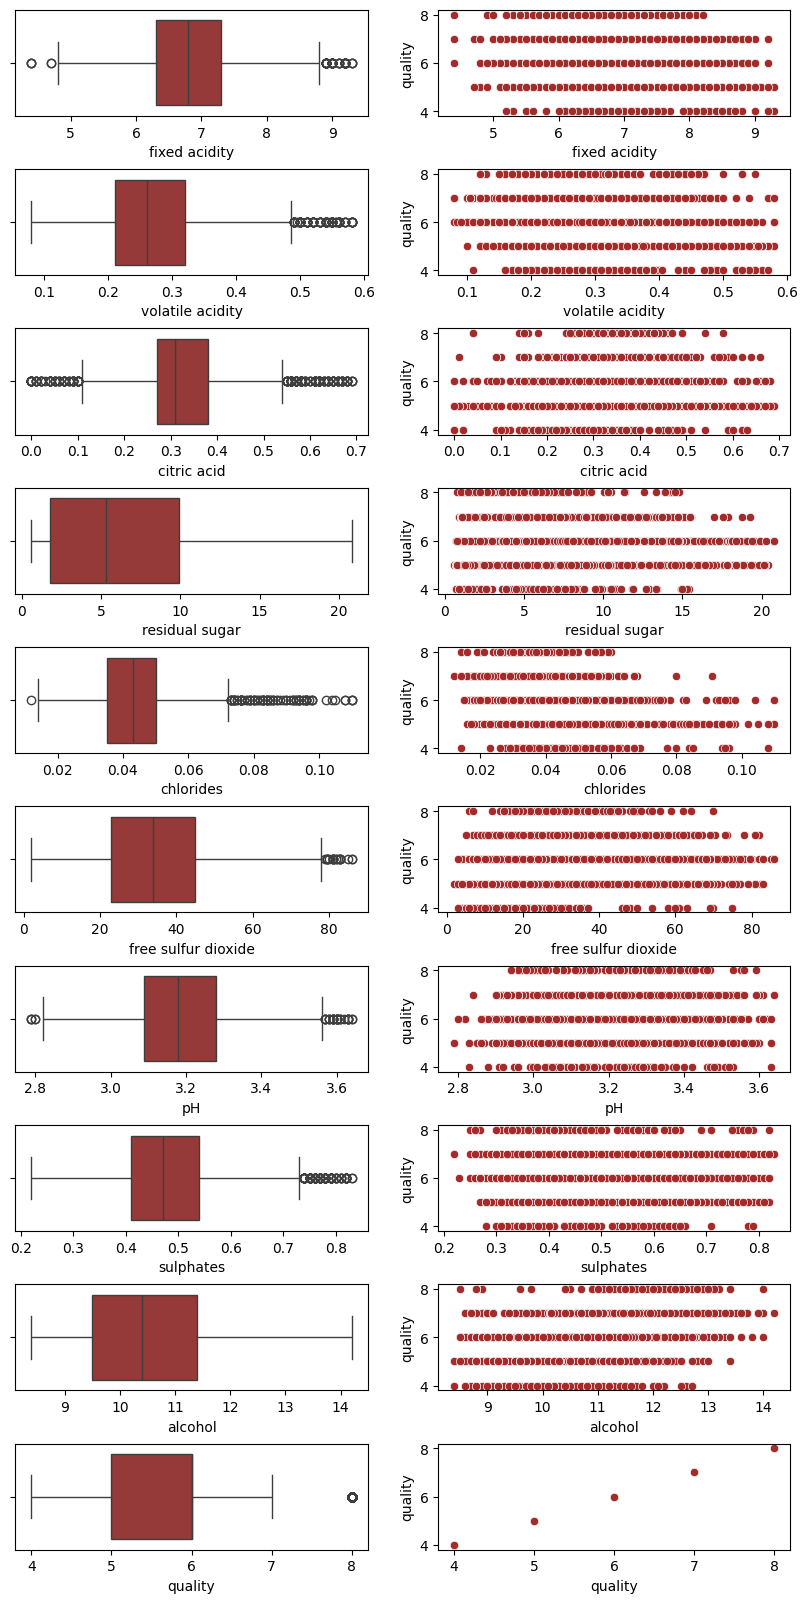

In [43]:
# Create a list of DataFrame columns
columns = list(data_no_outliers.columns)

# Create subplots
fig, ax = plt.subplots(10, 2, figsize=(10, 20))
plt.subplots_adjust(hspace=0.5)

# Plot each column
for i in range(10):
    # AX 1: Boxplot
    sns.boxplot(x=columns[i], data=data_no_outliers, ax=ax[i, 0],color='Brown')
    # AX 2: Scatterplot
    sns.scatterplot(x=columns[i], y='quality', data=data_no_outliers, ax=ax[i, 1],color='Brown')

# Save the plot as a JPEG file
plt.savefig('no_outlier_wine_plot.jpg', format='jpeg')

# Display the plot
plt.show()

**Normalizing the data**

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataset
normalized_wine_data = scaler.fit_transform(data_no_outliers)

# Convert the normalized dataset back to a DataFrame (optional)
normalized_wine_data = pd.DataFrame(normalized_wine_data, columns=data_no_outliers.columns)

# Summary statistics of the normalized dataset
print("Summary statistics of the normalized dataset:")
print(normalized_wine_data.describe())

Summary statistics of the normalized dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4490.000000       4490.000000  4490.000000     4490.000000   
mean        0.497989          0.382804     0.473038        0.287931   
std         0.160561          0.172213     0.146497        0.245194   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.387755          0.260000     0.391304        0.057550   
50%         0.489796          0.360000     0.449275        0.232673   
75%         0.591837          0.480000     0.550725        0.460396   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide           pH    sulphates  \
count  4490.000000          4490.000000  4490.000000  4490.000000   
mean      0.318179             0.391370     0.468314     0.435430   
std       0.119609             0.183729     0.168752     0.173570   
min       0.000000             0.00000

**Making prediction of formation using Random forest model on normalized data.**

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Split the dataset into features (X) and target variable (y)
X_normalized_wine = normalized_wine_data.drop(columns=['quality'])
y_normalized_wine = normalized_wine_data['quality']

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the model
rf_model.fit(X_normalized_wine, y_normalized_wine)

# Calculate R-squared score on the entire dataset
r2_score = rf_model.score(X_normalized_wine, y_normalized_wine)

# Print R-squared score
print("R-squared Score:", r2_score)


R-squared Score: 0.9394611619010348
